#**Module 7: Convolutional Neural Networks for Image Recognition**

### **Prepared by: Dr. Hum Nath Bhandari, Department of Mathematics, RWU**

### **Course**: MATH 355/COMSC 415-Machine Learning 

###  **Case Study6** :  **Building CNN  Model for Fashion Article Recognition**

### Name: Ella Costigan







## **Overview** 
In this case study, we build and implement CNN models for recognizing Fashion Articles. CNN is a Neural Network with convolution layer added which works well on recognizing images or video sequences represented by pixels. 


### **Computer Vision and Image Classification**

- **Computer Vision:** Computer vision is a field of artificial intelligence that enables computers to extract and understand information from images and videos. The goal of it is to give computers functionality similar to or better than human vision.

- **Image Recognition/Classification Problem:** One of the computer vision problems is image recognition or classification problems. Image recognition is a technology that uses AI to identify and distinguish images by learning patterns.

- **Applications of Image recognition/classification:** Image recognition/classification technology is applied in various fields such as object recognition, face recognition, and character recognition. Specifically, it is applied to automatic driving, tumor detection, and image processing for crime prevention.

### **CNN Architecture** 

- CNN consists of a series of layers such as convolutional layers, pooling layers, and fully connected layers. 

- The convolutional layer finds what kinds of features the input image has such as curves and angles.

- By moving a filter (kernel) over the input image and computing the value through an activation function, a feature map is generated. 

- Filters can be more than one to extract different features. 

- The pooling layer is located immediately after the convolutional layers and also extracts the input’s features. 

- Max pooling and average pooling are often used. 

- Pooling is used to reduce the resolution of a feature map and the advantage of this is that it reduces the amount of data without losing too much information.  It prevents the extracted features from being affected by environmental changes such as position and size on the image. 
- The fully connected layer is used for the final classification after iteration of the above layers and from the obtained feature parameters. Since the output of the convolution layer or pooling layer is usually in three dimensions, it is switched into output in a single dimension. Then like a normal neural network, the input is classified by using weights and bias.



## **Data: Fashion MNIST**

- Dataset consists of 10 different types of product images and labels
- Images are 28x28 pixel grayscale
- Data source: Fashion-MNIST dataset from the Keras library
- Training data size: 60,000 images and 60,000 labels
- Test data size: 10,000 images and 10,000 labels


labels = {

  0: 'T-shirt',
   
  1: 'Trouser',

  2: 'Pullover',

  3: 'Dress',
  
  4: 'Coat',
  
  5: 'Sandal',
  
  6: 'Shirt',
  
  7: 'Sneaker',
  
  8: 'Bag',

  9: 'AnkleBoot',
}

## **Step 1: Mount Google Drive and Provide Path**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/MMachine_Learning/Module7/Data/" # make similar to this path

output_dir_path = "/content/drive/MyDrive/Machine_Learning/Module7/Results/" #make similar to this path 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## **Step 2: Import Necessary Libraries**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, MaxPool2D, Conv2D
from keras.layers import Flatten
from keras.initializers import Constant
from tensorflow.keras import optimizers
from sklearn import metrics

## **Step 3: Load and Explore Data**

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [ ]:
#X: array of grayscale image data
#Y: array of labels (int in range 0-9)
print("X train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X test shape:", X_test.shape, "Y test shape:", y_test.shape)

X train shape: (60000, 28, 28) y_train shape: (60000,)
X test shape: (10000, 28, 28) Y test shape: (10000,)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

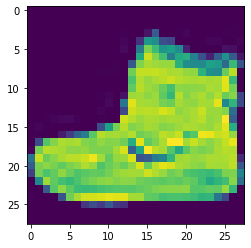

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

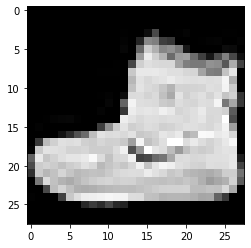

In [ ]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [ ]:
labels = {

  0: 'T-shirt',
   
  1: 'Trouser',

  2: 'Pullover',

  3: 'Dress',
  
  4: 'Coat',
  
  5: 'Sandal',
  
  6: 'Shirt',
  
  7: 'Sneaker',
  
  8: 'Bag',
  
  9: 'AnkleBoot',
}

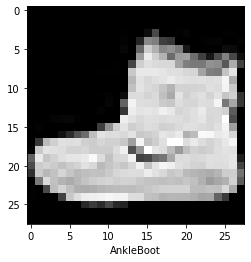

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'gray')
plt.xlabel(labels[y_train[0]])
plt.show()

In [ ]:
# This is just for visualization
X_train_plt = X_train.reshape((60000, 784))
X_test_plt = X_test.reshape((10000, 784))

In [ ]:
def plot_images(instances, size,  images_per_row = 10, **options):

    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap='gray', **options)
    plt.axis("off")

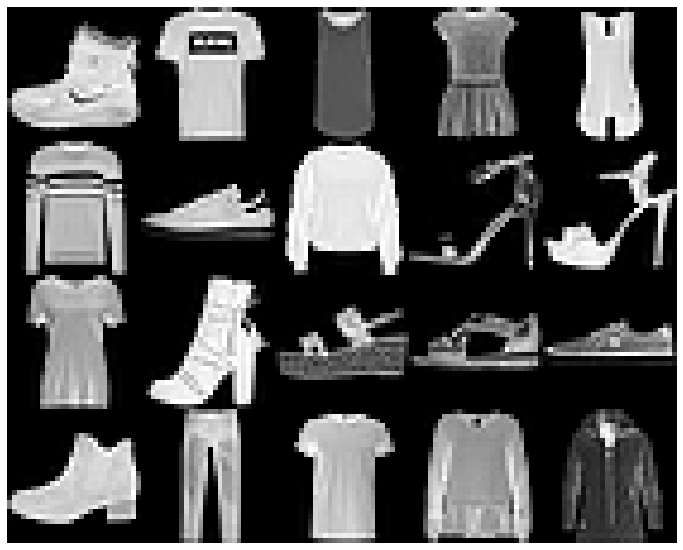

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

size = 28 

plt.figure(figsize=(12,12))

example_images = X_train_plt[:20]

plot_images(example_images, size, images_per_row = 5)

plt.show()

### **Your Task:**

 Put actual names of these clothings  either below or above the images

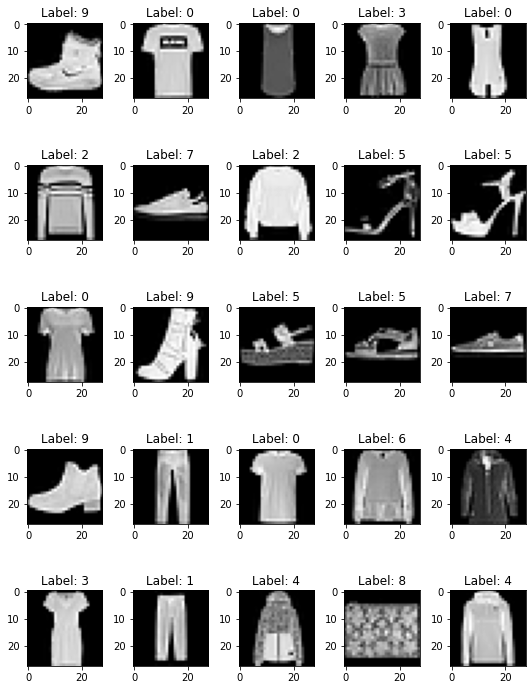

In [ ]:
num_row = 5
num_col = 5

num = num_row*num_col
images = X_train[:num]
labels = y_train[:num]

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
X_train = X_train / 255
X_test =  X_test / 255

**Remarks**: It is similar to MinMaxScaler():

 $$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$ 

### **(d)  Input Preparation**

- Need to reshape X_data:  (samples, height, width,depth)

In [ ]:
#transform the dataset into four dimensions: the number of samples, height, width, and depth in "channels_last" format
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


- Need to reshape y_data into categorical matrix based on number of classes

#### **One-hot Encoding** for categorical target variable

In [ ]:
from keras.utils import to_categorical

#Convert one-dimensional class arrays (output) into 10-dimensional class matrices:
y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)
#to_categorical: Converts a class vector (integers) to binary class matrix.



In [ ]:
print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##**Step 4:  Implement 2D CNN Models**



### **Some Supporting Functions**

In [ ]:
def write_dic_to_file(dic_name, file_name):
  file = open(file_name, 'w')
  file.write(str(dic_name))
  file.close()

import ast
def read_dic_from_file(file_name):
  file = open(file_name, "r")
  contents = file.read()
  dictionary = ast.literal_eval(contents)
  file.close()
  return dictionary



def create_error_plot(model_history):
  loss =  model_history.history['loss']
  val_loss = model_history.history['val_loss']
  accuracy = model_history.history['accuracy']
  val_acc = model_history.history['val_accuracy']

  #epochs = np.arange(len(loss))

  epochs = model_history.epoch
  fig = plt.figure(figsize = (12,5))

  plt.subplot(121)
  plt.plot(epochs, loss, color = 'red', marker = "s")
  plt.plot(epochs, val_loss, marker = "^")
  plt.legend(["loss", "validation loss"], loc="best")
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("Training and Validation Loss")

  plt.subplot(122)
  plt.plot(epochs, accuracy, color = 'red', marker = "o")
  plt.plot(epochs, val_acc, marker = "v")
  plt.legend(["accuracy", "validation accuracy"], loc="best")
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.title("Training and Validation Accuracy Scores")
  fig.savefig(output_dir_path + "error_plot.png", dpi = 600)
  plt.show()


#### **Build CNN Model**

Construct MultiLayer CNN model in TensorFlow/Keras

In [ ]:
def Build_CNN_Model(conv_layers, dense_layers, kernel_size = (2, 2),  input_shape = (28, 28, 1), output_dim = 10,  optimizer = 'Adam', learning_rate = 0.001, verbose = 1):
  
  #====Start model initialization====
  model = Sequential()

  #=====Add convolution layers=====
  for i in range(len(conv_layers)):
    if len(conv_layers) == 1:
      model.add(Conv2D(np.int(conv_layers[i]), kernel_size = kernel_size, input_shape = input_shape, activation='relu',  strides = 1, padding = 'same'))
      model.add(MaxPool2D(padding = 'same'))
    else:
      
      if i == 0:
        model.add(Conv2D(np.int(conv_layers[i]), kernel_size = kernel_size, input_shape = input_shape, activation='relu',  strides = 1, padding = 'same'))
        model.add(MaxPool2D(padding='same'))
  
      else:
        model.add(Conv2D(np.int(conv_layers[i]), kernel_size = kernel_size, activation='relu',  strides = 1, padding = 'same'))
        model.add(MaxPool2D(padding='same'))

  #=====Flatten the output from Convolution + Pooling Layer =====
  model.add(Flatten())

  #=====Adding fully connected (dense ) layers =====
  for i in range(len(dense_layers)):
    model.add(Dense(np.int(dense_layers[i]),  activation='relu'))
    #model.add(Dropout(0.10))

  #=====Adding output layers =====
  model.add(Dense(np.int(output_dim),  activation = 'softmax'))
  
  #=====Select Optimizer =====
  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad': 
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! \
    Please apply your optimizer manually...")
  
  #=====Compile Model =====
  model.compile(loss='categorical_crossentropy', optimizer = opt,  metrics = ['accuracy'])
   
  if verbose == 1:
    print(model.summary())
  return model

### **Testing:** Makeing sure our model was construced appropriately

In [ ]:
#test if the function is working

conv_layers = [32, 16]

dense_layers = [ 20, 10]

kernel_size =  (2,2)

input_shape = (28, 28, 1)

output_dim = 10

optimizer = 'Adam'

learning_rate = 0.001

verbose = 1

Build_CNN_Model(conv_layers, dense_layers,  kernel_size, input_shape, output_dim, optimizer, learning_rate, verbose )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                1

## **Implement CNN Models** 

In [ ]:

def CNN_Model (conv_layers =  [32, 16],
               dense_layers = [20, 10],
               kernel_size = (2,2),
               input_shape = (28, 28, 1),  
               output_dim  = 10,
               optimizer = 'Adam',
               learning_rate = 0.001,
               X_train = None,
               y_train = None,
               X_test =  None, 
               y_test =  None, 
               val_split = 0.2,
               batch_size = 32,
               epochs = 2, 
               verbose = 1):
  
  print('Building CNN Model.......................\n')
  #Build CNN model
  model = Build_CNN_Model(conv_layers, dense_layers,  kernel_size, input_shape, output_dim, optimizer, learning_rate, verbose =0 )
  
  print('Fitting  CNN Model.......................\n')
  #Fit CNN model
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 10)
  #history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,  validation_split = val_split, callbacks = [callback], verbose = verbose)
  history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,  validation_split = val_split, verbose = verbose)
  
  print('Calculating predictions and scores....')
  print('Calculating predictions and scores.......................\n')

  #Calculate predictions 
  pred = model.predict(X_test)

  #Calculate test scores
  scores = model.evaluate(X_test, y_test)

  #Create plots
  #create_error_plot(history)
  
  print('Collecting outputs.......................\n')
  output = {
            'model': model,
            'model_history': history, 
            'test_loss': scores[0],
            'test_acc': scores[1],
            'test_predictions': pred,
       }
  
  print('Congratuations! All the processes are completed successfully....\n')  
  return output
  

**Testing:**


In [ ]:
model_output = CNN_Model (conv_layers =  [16, 8],
                    dense_layers = [10, 5],
                    kernel_size = (2,2) ,
                    input_shape = (28, 28, 1), 
                    output_dim  = 10, 
                    optimizer = 'Adam', 
                    learning_rate = 0.001,
                    X_train = X_train,
                    y_train = y_train,
                    X_test = X_test,
                    y_test =  y_test, 
                    val_split = 0.2,
                    batch_size = 32,
                    epochs = 50, 
                    verbose = 1
                    )

Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3116 - accuracy: 0.0971 - val_loss: 2.2284 - val_accuracy: 0.1074
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 1.7671 - accuracy: 0.3167 - val_loss: 1.3209 - val_accuracy: 0.5038
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 1.0411 - accuracy: 0.6377 - val_loss: 0.8495 - val_accuracy: 0.7227
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7172 - accuracy: 0.7508 - val_loss: 0.6550 - val_accuracy: 0.7448
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5950 - accuracy: 0.7780 - val_loss: 0.5670 - val_accuracy: 0.7890
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5379 - accuracy: 0.7960 - val_loss: 0.5274 - val_accuracy: 0.7960
Epoch 7/50
1500/1500 [============================

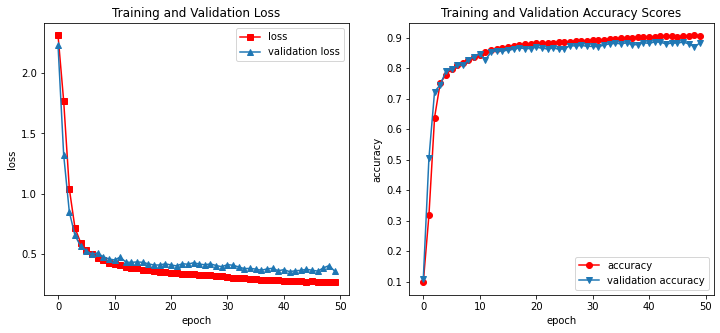

In [ ]:
create_error_plot(model_output['model_history'])

## **Your Task**: 

- Experiment the above model multiple times with relatively higher epochs (say, 50 or 100) and identify whether it is better to stop early.

- You need to find the most appropriate value of epochs (neigher very large nor very small)

- Error plot will be helpful to identify where we can stop training.

- Focus on behavior of training accuracy and validation accuracy.

- At this point you will be tuning the value of one hyperparameter of CNN model, ie. epochs.


 

**Try 1:** Best to Stop Early Due to GPU Run Time Crashing

In [ ]:
model_output2 = CNN_Model (conv_layers =  [16, 8],
                    dense_layers = [10, 5],
                    kernel_size = (2,2) ,
                    input_shape = (28, 28, 1), 
                    output_dim  = 10, 
                    optimizer = 'Adam', 
                    learning_rate = 0.001,
                    X_train = X_train,
                    y_train = y_train,
                    X_test = X_test,
                    y_test =  y_test, 
                    val_split = 0.2,
                    batch_size = 32,
                    epochs = 100, 
                    verbose = 1
                    )

create_error_plot(model_output2['model_history'])

Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/100
  88/1500 [>.............................] - ETA: 6s - loss: 2.4183 - accuracy: 0.0945

KeyboardInterrupt: ignored

**Try 2:**

Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 1.9104 - accuracy: 0.2715 - val_loss: 1.4728 - val_accuracy: 0.4372
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0950 - accuracy: 0.5734 - val_loss: 0.6765 - val_accuracy: 0.7353
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5898 - accuracy: 0.7599 - val_loss: 0.5496 - val_accuracy: 0.7894
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4918 - accuracy: 0.8079 - val_loss: 0.4623 - val_accuracy: 0.8278
Epoch 5/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4386 - accuracy: 0.8371 - val_loss: 0.4276 - val_accuracy: 0.8470
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4074 - accuracy: 0.8553 - val_loss: 0.4399 - val_accuracy: 0.8474
Epoch 7/25
1500/1500 [============================

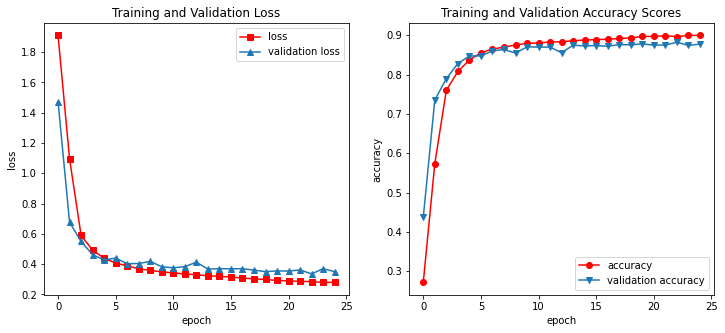

In [ ]:
model_output3 = CNN_Model (conv_layers =  [16, 8],
                    dense_layers = [10, 5],
                    kernel_size = (2,2) ,
                    input_shape = (28, 28, 1), 
                    output_dim  = 10, 
                    optimizer = 'Adam', 
                    learning_rate = 0.001,
                    X_train = X_train,
                    y_train = y_train,
                    X_test = X_test,
                    y_test =  y_test, 
                    val_split = 0.2,
                    batch_size = 32,
                    epochs = 25, 
                    verbose = 1
                    )

create_error_plot(model_output3['model_history'])

**Try 3:**

Building CNN Model.......................

Fitting  CNN Model.......................

1500/1500 [==============================] - 7s 4ms/step - loss: 1.8760 - accuracy: 0.2510 - val_loss: 1.5731 - val_accuracy: 0.3716
Calculating predictions and scores....
Calculating predictions and scores.......................

313/313 [==============================] - 1s 3ms/step - loss: 1.5867 - accuracy: 0.3711

Congratuations! All the processes are completed successfully....



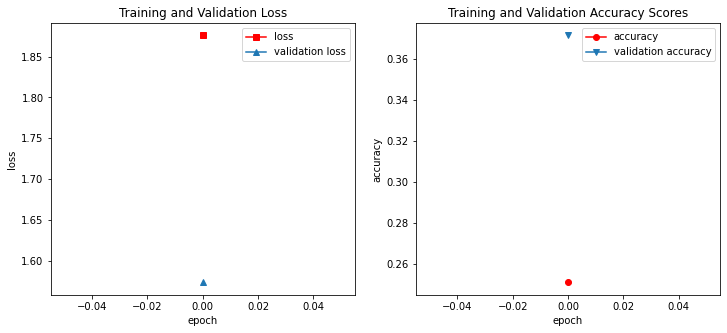

In [ ]:
model_output4 = CNN_Model (conv_layers =  [16, 8],
                    dense_layers = [10, 5],
                    kernel_size = (2,2) ,
                    input_shape = (28, 28, 1), 
                    output_dim  = 10, 
                    optimizer = 'Adam', 
                    learning_rate = 0.001,
                    X_train = X_train,
                    y_train = y_train,
                    X_test = X_test,
                    y_test =  y_test, 
                    val_split = 0.2,
                    batch_size = 32,
                    epochs = 1, 
                    verbose = 1
                    )

create_error_plot(model_output4['model_history'])

### **Remarks:** Running about 25-50 epochs gives the best results. Both achieved an accuracy score of 87%. Running too many epochs gives unknown results due to the computers' GPU runtime. Google would crash after 80 epcochs. From what it appeared while running was that the average accuracy would be better. Running too little of epochs does not give good results.

## **Step 5: Dealing with the Stochastic Behavior of Deep Learning Models and Checking Robustness of the Models**

## **Multi-Run CNN Model**

In [ ]:
import pandas as pd

In [ ]:

def Multi_Run_CNN_Model(num_replicates =  None,
                      conv_layers = None,
                      dense_layers =  None,
                      kernel_size =  None,
                      input_shape =  None,
                      output_dim  =  None,
                      optimizer =  None,
                      learning_rate = None,
                      X_train = None,
                      y_train = None,
                      X_test =  None, 
                      y_test =  None, 
                      val_split = None,
                      batch_size =  None,
                      epochs =  None,
                      verbose =  None,
                      ):
  
  
  all_test_acc = []
  best_test_acc = 0
  best_replicate = None,
  best_test_model = None, 

  for i in range(num_replicates):
    print('===== Running ' + str(i) +" replicate=======")

    model_output = CNN_Model (conv_layers = conv_layers,
                              dense_layers = dense_layers,
                              kernel_size = kernel_size,
                              input_shape =input_shape,
                              output_dim = output_dim,
                              optimizer  =  optimizer,
                              learning_rate= learning_rate,
                              X_train=  X_train,
                              y_train =  y_train,
                              X_test = X_test,
                              y_test =  y_test,
                              val_split= val_split,
                              epochs =  epochs, 
                              verbose = 1)
    
    all_test_acc.append(model_output['test_acc'])

    if model_output['test_acc'] > best_test_acc:
      best_test_model = model_output
      best_replicate = i


  avg_test_acc = np.mean(np.array(all_test_acc))
  
  output = {
      'best_model':  best_test_model,
      'best_replicate': best_replicate,
      'all_test_acc': all_test_acc,
      'average_test_acc': avg_test_acc
  }
  
  #file_name = output_dir_path+ "multi-run-cnn-" + str(conv_layers) +"-conv_layers-"+ str(dense_layers) + "-dense_layers-"+ "results" + ".txt"
  #write_dic_to_file(output, file_name)

  print('Avarage test accuracy: ', avg_test_acc)

  #file_name = output_dir_path+ "multi-run-cnn-" + str(conv_layers) + "-conv_layers-"+ str(dense_layers) + "-dense_layers-"+ "-all_accuracies-" + ".txt"
  

  return output

In [ ]:
model_output = Multi_Run_CNN_Model(num_replicates = 1, conv_layers =  [16, 8],
                    dense_layers = [10, 5],
                    kernel_size = (2,2) ,
                    input_shape = (28, 28, 1), 
                    output_dim  = 10, 
                    optimizer = 'Adam', 
                    learning_rate = 0.001,
                    X_train = X_train,
                    y_train = y_train,
                    X_test = X_test,
                    y_test =  y_test, 
                    val_split = 0.2,
                    batch_size = 32,
                    epochs = 25, 
                    verbose = 1
                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 2.0374 - accuracy: 0.2552 - val_loss: 1.5373 - val_accuracy: 0.3522
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3324 - accuracy: 0.4454 - val_loss: 1.2195 - val_accuracy: 0.4951
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 1.1745 - accuracy: 0.5036 - val_loss: 1.1465 - val_accuracy: 0.4951
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0853 - accuracy: 0.5504 - val_loss: 1.0653 - val_accuracy: 0.5773
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 1.0239 - accuracy: 0.5871 - val_loss: 0.9913 - val_accuracy: 0.6323
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8040 - accuracy: 0.7140 - val_loss: 0.6854 - val_accuracy: 0.7698
Epoch 7/25
1500/1

In [ ]:
model_output 

{'best_model': {'model': <keras.engine.sequential.Sequential at 0x7ff2666cdc40>,
  'model_history': <keras.callbacks.History at 0x7ff2666bb940>,
  'test_loss': 0.4747839868068695,
  'test_acc': 0.8446000218391418,
  'test_predictions': array([[2.1334695e-06, 2.5577851e-11, 6.6773090e-08, ..., 5.5936854e-03,
          1.9716792e-04, 9.8658979e-01],
         [1.6009370e-04, 0.0000000e+00, 9.7658032e-01, ..., 0.0000000e+00,
          1.1661052e-16, 0.0000000e+00],
         [1.5345175e-05, 9.7991002e-01, 5.2690016e-06, ..., 6.2983228e-05,
          2.1705935e-03, 6.3385419e-03],
         ...,
         [5.9995658e-10, 1.8590620e-09, 3.7063564e-06, ..., 1.0357443e-04,
          9.9335736e-01, 5.8426954e-06],
         [1.5345175e-05, 9.7991002e-01, 5.2690016e-06, ..., 6.2983228e-05,
          2.1705935e-03, 6.3385419e-03],
         [6.6359726e-14, 0.0000000e+00, 9.8340613e-14, ..., 2.2009592e-01,
          2.6645819e-06, 1.9459218e-01]], dtype=float32)},
 'best_replicate': 0,
 'all_test_acc':

##**Saving results in files**

In [ ]:
#full results 
write_dic_to_file(model_output, output_dir_path+ "model1_full_results" + ".txt")
# Test accuracies from all replicates
pd.DataFrame(model_output['all_test_acc']).to_csv(output_dir_path+"model1_all_test_acc.csv")



## **Step 6: Hyperparameter Tuning**


## **Your Tasks**

You need to tune at least the following hyperparamters parameters.

- Models: [Model 1, Model 2, Model 3]

    - **Model 1:  32-filters single convolutional layer and 20 neurons single dense layer CNN Model**

    - **Model 2:  32-16-filters two convolutional layers and 20-10 neurons two dense layers CNN Model**

    - **Model 3:  32-16-8-filters three convolutional layers and   20-10 neurons two dense layers CNN Model**


- Options for Optimizers = ['Adam', 'Adagrad']

- Options for Learning Rates  = [0.01, 0.001]

- There will be total of 12 cases ( 3 x 2 x 2)

- Each of the cases should be excecuted with 10 independent replicates(runs) 

- You are encourased to try more combinations if you want.

- For each cases you need to record the value of **average test accuracy score** after 10 independent replicates.

- Make a table with nice layout and record average accuracy values in each boxes. You can use latex (prefered) or word to create tables. 

- See the reference poster for further help. 

- See below one of the cases and you can do similar for other cases. 

- You need to pick a resonable epoch number  based on your experiment. 

- Once these hyper parameters are tunned, then we will re-train our models one more time with tbe best hyperpameters. 









#### **Case I:**

 - conv_layers =  [32]
 - dense_layers = [20]
 - optimizer = 'Adam'
 - learning_rate = 0.01
 - num_replicagtes = 1


You need to test similar 11 more cases..



In [ ]:
case1_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                   conv_layers =  [32],
                                   dense_layers = [20],
                                   kernel_size = (2,2) ,
                                   input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adam', 
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, #To save time
                                    verbose = 1
                                    )


#full results 
write_dic_to_file(case1_model_output, output_dir_path+ "case1_hyperparameter_tuning_results" + ".txt")

print(case1_model_output)

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3875 - accuracy: 0.3263 - val_loss: 0.7502 - val_accuracy: 0.7098
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6060 - accuracy: 0.7623 - val_loss: 0.6043 - val_accuracy: 0.7855
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5187 - accuracy: 0.8124 - val_loss: 0.4913 - val_accuracy: 0.8266
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4754 - accuracy: 0.8289 - val_loss: 0.4859 - val_accuracy: 0.8267
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4715 - accuracy: 0.8303 - val_loss: 0.4938 - val_accuracy: 0.8237
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4848 - accuracy: 0.8262 - val_loss: 0.4777 - val_accuracy: 0.8314
Epoch 7/10
1500/1



#### **Case II:**

 - conv_layers =  [32]
 - dense_layers = [20]
 - optimizer = 'Adam'
 - learning_rate = 0.001
 - num_replicagtes = 1

In [ ]:
case2_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                   conv_layers =  [32],
                                   dense_layers = [20],
                                   kernel_size = (2,2) ,
                                   input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adam', 
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


#full results 
write_dic_to_file(case2_model_output, output_dir_path+ "case2_hyperparameter_tuning_results" + ".txt")
print(case2_model_output)

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.4294 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 7/10
1500/1



#### **Case III:**

 - conv_layers =  [32]
 - dense_layers = [20]
 - optimizer = 'Adagrad'
 - learning_rate = 0.01
 - num_replicagtes = 10

In [ ]:
case3_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32],
                                    dense_layers = [20],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad', 
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


#full results 
write_dic_to_file(case3_model_output, output_dir_path+ "case3_hyperparameter_tuning_results" + ".txt")
print(case3_model_output)

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.4312 - accuracy: 0.2909 - val_loss: 1.5931 - val_accuracy: 0.3898
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5159 - accuracy: 0.4272 - val_loss: 1.4229 - val_accuracy: 0.4705
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1812 - accuracy: 0.5762 - val_loss: 1.1148 - val_accuracy: 0.5875
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0369 - accuracy: 0.6266 - val_loss: 1.0248 - val_accuracy: 0.6382
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9612 - accuracy: 0.6512 - val_loss: 0.9885 - val_accuracy: 0.6378
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9168 - accuracy: 0.6605 - val_loss: 0.9332 - val_accuracy: 0.6502
Epoch 7/10
1500/1


#### **Case IV:**

 - conv_layers =  [32]
 - dense_layers = [20]
 - optimizer = 'Adagrad'
 - learning_rate = 0.001
 - num_replicagtes = 10

In [ ]:
case4_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32],
                                    dense_layers = [20],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad', 
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


#full results 
write_dic_to_file(case4_model_output, output_dir_path+ "case4_hyperparameter_tuning_results" + ".txt")
print(case4_model_output)



===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.7989 - accuracy: 0.3569 - val_loss: 1.3081 - val_accuracy: 0.4978
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.1771 - accuracy: 0.5742 - val_loss: 1.0751 - val_accuracy: 0.6383
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9807 - accuracy: 0.6555 - val_loss: 0.9373 - val_accuracy: 0.6602
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.8611 - accuracy: 0.7166 - val_loss: 0.8688 - val_accuracy: 0.7548
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7732 - accuracy: 0.7677 - val_loss: 0.7650 - val_accuracy: 0.7740
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7081 - accuracy: 0.7789 - val_loss: 0.7207 - val_accuracy: 0.7790
Epoch 7/10
1500/1


#### **Case V:**

 - conv_layers =  [32, 16]
 - dense_layers = [20, 10]
 - optimizer = 'Adam'
 - learning_rate = 0.01
 - num_replicagtes = 10

In [ ]:
case5_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32, 16],
                                    dense_layers = [20, 10],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adam', 
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


#full results 
write_dic_to_file(case5_model_output, output_dir_path+ "case5_hyperparameter_tuning_results" + ".txt")
print(case5_model_output)



===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7192 - accuracy: 0.7396 - val_loss: 0.5476 - val_accuracy: 0.8027
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5109 - accuracy: 0.8143 - val_loss: 0.4806 - val_accuracy: 0.8349
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4805 - accuracy: 0.8301 - val_loss: 0.4669 - val_accuracy: 0.8362
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4757 - accuracy: 0.8352 - val_loss: 0.4757 - val_accuracy: 0.8332
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4717 - accuracy: 0.8351 - val_loss: 0.4508 - val_accuracy: 0.8431
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4529 - accuracy: 0.8428 - val_loss: 0.4842 - val_accuracy: 0.8278
Epoch 7/10
1500/1


#### **Case VI:**

 - conv_layers =  [32, 16]
 - dense_layers = [20, 10]
 - optimizer = 'Adam'
 - learning_rate = 0.001
 - num_replicagtes = 10

In [ ]:
case6_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32, 16],
                                    dense_layers = [20, 10],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adam', 
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


#full results 
write_dic_to_file(case6_model_output, output_dir_path+ "case6_hyperparameter_tuning_results" + ".txt")

print(case6_model_output)

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.1364 - accuracy: 0.6067 - val_loss: 0.6691 - val_accuracy: 0.7999
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5535 - accuracy: 0.8295 - val_loss: 0.5120 - val_accuracy: 0.8300
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4329 - accuracy: 0.8582 - val_loss: 0.4122 - val_accuracy: 0.8608
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3671 - accuracy: 0.8727 - val_loss: 0.3632 - val_accuracy: 0.8745
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3313 - accuracy: 0.8812 - val_loss: 0.3501 - val_accuracy: 0.8773
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3079 - accuracy: 0.8894 - val_loss: 0.3495 - val_accuracy: 0.8758
Epoch 7/10
1500/1

#### **Case VII:**

 - conv_layers =  [32, 16]
 - dense_layers = [20, 10]
 - optimizer = 'Adagrad'
 - learning_rate = 0.01
 - num_replicagtes = 10

In [ ]:
case7_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32, 16],
                                    dense_layers = [20, 10],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad', 
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


#full results 
write_dic_to_file(case7_model_output, output_dir_path+ "case7_hyperparameter_tuning_results" + ".txt")

print(case7_model_output)


===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8494 - accuracy: 0.7249 - val_loss: 0.5070 - val_accuracy: 0.8240
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4478 - accuracy: 0.8441 - val_loss: 0.4251 - val_accuracy: 0.8497
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3906 - accuracy: 0.8647 - val_loss: 0.3931 - val_accuracy: 0.8623
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3607 - accuracy: 0.8744 - val_loss: 0.3796 - val_accuracy: 0.8653
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3416 - accuracy: 0.8800 - val_loss: 0.3639 - val_accuracy: 0.8722
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3258 - accuracy: 0.8857 - val_loss: 0.3615 - val_accuracy: 0.8746
Epoch 7/10
1500/1

#### **Case VIII:**

 - conv_layers =  [32, 16]
 - dense_layers = [20, 10]
 - optimizer = 'Adagrad'
 - learning_rate = 0.001
 - num_replicagtes = 10

In [ ]:
case8_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32, 16],
                                    dense_layers = [20, 10],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad', 
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )

#full results 
write_dic_to_file(case8_model_output, output_dir_path+ "case8_hyperparameter_tuning_results" + ".txt")

print(case8_model_output)



===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6409 - accuracy: 0.5587 - val_loss: 1.2500 - val_accuracy: 0.6697
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1485 - accuracy: 0.6945 - val_loss: 1.0853 - val_accuracy: 0.7190
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.0324 - accuracy: 0.7260 - val_loss: 1.0113 - val_accuracy: 0.7362
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9703 - accuracy: 0.7409 - val_loss: 0.9610 - val_accuracy: 0.7433
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9282 - accuracy: 0.7516 - val_loss: 0.9281 - val_accuracy: 0.7503
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.8973 - accuracy: 0.7592 - val_loss: 0.9024 - val_accuracy: 0.7557
Epoch 7/10
1500/1

#### **Case IX:**

 - conv_layers =  [32, 16, 8]
 - dense_layers = [20, 10]
 - optimizer = 'Adam'
 - learning_rate = 0.01
 - num_replicagtes = 10

In [ ]:
case9_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32, 16],
                                    dense_layers = [20, 10],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adam', 
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


write_dic_to_file(case9_model_output, output_dir_path+ "case9_hyperparameter_tuning_results" + ".txt")

print(case9_model_output)
#full results 


===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0007 - accuracy: 0.6785 - val_loss: 0.5773 - val_accuracy: 0.7962
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5523 - accuracy: 0.8019 - val_loss: 0.4998 - val_accuracy: 0.8246
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4882 - accuracy: 0.8226 - val_loss: 0.4779 - val_accuracy: 0.8309
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4569 - accuracy: 0.8336 - val_loss: 0.4784 - val_accuracy: 0.8243
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4422 - accuracy: 0.8410 - val_loss: 0.4470 - val_accuracy: 0.8387
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4281 - accuracy: 0.8438 - val_loss: 0.4215 - val_accuracy: 0.8441
Epoch 7/10
1500/1

#### **Case X:**

 - conv_layers =  [32, 16, 8]
 - dense_layers = [20, 10]
 - optimizer = 'Adam'
 - learning_rate = 0.001
 - num_replicagtes = 10

In [ ]:
case10_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32, 16, 8],
                                    dense_layers = [20, 10],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adam', 
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


write_dic_to_file(case10_model_output, output_dir_path+ "case10_hyperparameter_tuning_results" + ".txt")

print(case10_model_output)
#full results 


===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.9262 - accuracy: 0.6876 - val_loss: 0.5248 - val_accuracy: 0.8090
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4749 - accuracy: 0.8290 - val_loss: 0.4306 - val_accuracy: 0.8461
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4121 - accuracy: 0.8531 - val_loss: 0.4080 - val_accuracy: 0.8551
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3755 - accuracy: 0.8659 - val_loss: 0.3805 - val_accuracy: 0.8642
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3534 - accuracy: 0.8742 - val_loss: 0.3615 - val_accuracy: 0.8686
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.8773 - val_loss: 0.3549 - val_accuracy: 0.8754
Epoch 7/10
1500/1

#### **Case XI:**

 - conv_layers =  [32, 16, 8]
 - dense_layers = [20, 10]
 - optimizer = 'Adagrad'
 - learning_rate = 0.01
 - num_replicagtes = 10

In [ ]:
case11_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32, 16, 8],
                                    dense_layers = [20, 10],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad', 
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


write_dic_to_file(case11_model_output, output_dir_path+ "case11_hyperparameter_tuning_results" + ".txt")

print(case11_model_output)
#full results 

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.9817 - accuracy: 0.6691 - val_loss: 0.6712 - val_accuracy: 0.7631
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6238 - accuracy: 0.7791 - val_loss: 0.5845 - val_accuracy: 0.7907
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5608 - accuracy: 0.8006 - val_loss: 0.5463 - val_accuracy: 0.8043
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5276 - accuracy: 0.8122 - val_loss: 0.5246 - val_accuracy: 0.8134
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5063 - accuracy: 0.8214 - val_loss: 0.5072 - val_accuracy: 0.8198
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4891 - accuracy: 0.8260 - val_loss: 0.4927 - val_accuracy: 0.8263
Epoch 7/10
1500/1

#### **Case XII:**

 - conv_layers =  [32, 16, 8]
 - dense_layers = [20, 10]
 - optimizer = 'Adagrad'
 - learning_rate = 0.001
 - num_replicagtes = 10

In [ ]:
case12_model_output = Multi_Run_CNN_Model(num_replicates = 1,
                                    conv_layers =  [32, 16, 8],
                                    dense_layers = [20, 10],
                                    kernel_size = (2,2) ,
                                    input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad', 
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 10, 
                                    verbose = 1
                                    )


write_dic_to_file(case12_model_output, output_dir_path+ "case12_hyperparameter_tuning_results" + ".txt")

print(case12_model_output)
#full results 

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3331 - accuracy: 0.2181 - val_loss: 1.9573 - val_accuracy: 0.3027
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.8552 - accuracy: 0.3411 - val_loss: 1.7465 - val_accuracy: 0.3900
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6801 - accuracy: 0.4150 - val_loss: 1.6097 - val_accuracy: 0.4400
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.5637 - accuracy: 0.4493 - val_loss: 1.5159 - val_accuracy: 0.4661
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.4788 - accuracy: 0.4770 - val_loss: 1.4415 - val_accuracy: 0.4917
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.4104 - accuracy: 0.5016 - val_loss: 1.3794 - val_accuracy: 0.5167
Epoch 7/10
1500/1

## **End Results of Step 6-Hyperparameter Tuning**


Discuss your results of parameter tuning. 

For the project, consider the following.

- Design a table and then enter average accuracy scores(**avg_test-acc**) for each case. There will be 12 different values in the table. 

- Design another table consisting the best hyperparameters(Optimizer and learning rate) for three different model configurations. 

- Discuss/Interprete results.

In [ ]:
avg_test_acc_scores = {
    "case 1" : case1_model_output['all_test_acc'],
    "case 2" : case2_model_output['all_test_acc'],
    "case 3" : case3_model_output['all_test_acc'],
    "case 4" : case4_model_output['all_test_acc'],
    "case 5" : case5_model_output['all_test_acc'],
    "case 6" : case6_model_output['all_test_acc'],
    "case 7" : case7_model_output['all_test_acc'],
    "case 8" : case8_model_output['all_test_acc'],
    "case 9" : case9_model_output['all_test_acc'],
    "case 10" : case10_model_output['all_test_acc'],
    "case 11" : case11_model_output['all_test_acc'],
    "case 12" : case12_model_output['all_test_acc'],

}

avg_test_acc_df = pd.DataFrame(avg_test_acc_scores)
print(avg_test_acc_df)

   case 1  case 2  case 3  case 4  case 5  case 6  case 7  case 8  case 9  \
0  0.8134     0.1  0.6786  0.7923  0.8417  0.8897  0.8736  0.7639   0.811   

   case 10  case 11  case 12  
0   0.8694   0.8289   0.6113  


In [ ]:
hyperparameters = {
    "Model 1" : ['Adam', '0.01', 'conv_layers [32]', 'dense_layer [20]'],
    "Model 2" : ['Adam', '0.001', 'conv_layers [32,16]', 'dense_layer [20,10]'],
    "Model 3" : ['Adam', '0.01', 'conv_layers [32,16,8]', 'dense_layer [20,10]'],
}

hyperparameters_df = pd.DataFrame(hyperparameters)
print(hyperparameters_df)

            Model 1              Model 2                Model 3
0              Adam                 Adam                   Adam
1              0.01                0.001                   0.01
2  conv_layers [32]  conv_layers [32,16]  conv_layers [32,16,8]
3  dense_layer [20]  dense_layer [20,10]    dense_layer [20,10]


### Remarks: I found that the best model was case 6 using an adam optimizer with a learning rate of 0.001. Thishad the highest accuracy score.

## **Step 7: Full Scale Training with Optimized Hyperparameters**

After tuning the hyperparameters for the constructed models, you need to retrain your models in a full scale with the best hyperparameters.


### **Model 1: 32-filters single convolutional layer and 20 neurons single dense layer CNN Model**

For example, lets pretend we got the  best hyperpameters as follows.

- Best optimizer: "Adagrad" 
- Best learning rate: 0.001
- Best epochs = 30


Then  you need to train the Model 1 one more time. 



#### **Step 1: Train the model upto 10 independent replicates**

In [ ]:
model1_final_output = Multi_Run_CNN_Model(num_replicates = 1,
                                   conv_layers =  [32],
                                   dense_layers = [20],
                                   kernel_size = (2,2) ,
                                   input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad',  # best optimizer
                                    learning_rate = 0.001, # best learning rate
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20, # best epochs
                                    verbose = 1
                                    )



===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1436 - accuracy: 0.6750 - val_loss: 0.8114 - val_accuracy: 0.7394
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7167 - accuracy: 0.7734 - val_loss: 0.6868 - val_accuracy: 0.7906
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6200 - accuracy: 0.8006 - val_loss: 0.6304 - val_accuracy: 0.8062
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5635 - accuracy: 0.8162 - val_loss: 0.5879 - val_accuracy: 0.8159
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5264 - accuracy: 0.8271 - val_loss: 0.5755 - val_accuracy: 0.8220
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4999 - accuracy: 0.8350 - val_loss: 0.5525 - val_accuracy: 0.8253
Epoch 7/20
1500/1

In [ ]:
model1_final_output

{'best_model': {'model': <keras.engine.sequential.Sequential at 0x7ff2480cadf0>,
  'model_history': <keras.callbacks.History at 0x7ff24816e160>,
  'test_loss': 0.4729650914669037,
  'test_acc': 0.8493000268936157,
  'test_predictions': array([[2.45976439e-09, 1.16394060e-23, 1.90554211e-10, ...,
          1.31064226e-04, 7.03344849e-09, 9.97065127e-01],
         [3.92426739e-14, 4.81075009e-16, 9.99900103e-01, ...,
          5.47692893e-17, 1.77091366e-07, 6.79249441e-19],
         [8.09559707e-22, 1.00000000e+00, 4.90910269e-15, ...,
          3.32844219e-09, 1.29300138e-14, 1.20648485e-20],
         ...,
         [2.96580165e-05, 1.79014881e-09, 4.51999904e-06, ...,
          1.27593026e-04, 9.98825133e-01, 2.42867754e-05],
         [4.38245148e-19, 9.99998689e-01, 3.38061446e-09, ...,
          1.27291557e-07, 2.40528222e-11, 1.25237593e-16],
         [8.97865370e-03, 3.62085951e-11, 8.81786807e-04, ...,
          3.00910473e-01, 1.54533582e-02, 8.74147844e-03]], dtype=float32)},
 '

In [ ]:
#full results 
write_dic_to_file(model1_final_output, output_dir_path+ "model1_full_results" + ".txt")
# Test accuracies from all replicates
pd.DataFrame(model1_final_output['all_test_acc']).to_csv(output_dir_path+"model1_all_test_acc.csv")



### **Step2: Boxplot of all the accuracies obtained from 10 replicates**

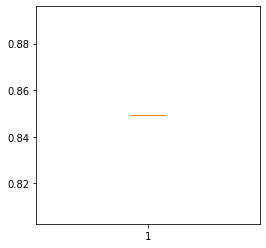

In [ ]:
model1_all_test_acc = pd.read_csv(output_dir_path+"model1_all_test_acc.csv")

import matplotlib.pyplot as plt

fig = plt.figure(figsize= (4, 4))
plt.boxplot(model1_all_test_acc.iloc[:,1])

fig.savefig(output_dir_path+"model1_test_acc_boxplot.png", dpi = 600)
plt.show()


### **Model 2: 32-16-filters two convolutional layers and 20-10 neurons two dense layers CNN Model**


For example, lets pretend we got the  best hyperpameters as follows.

- Best optimizer: "Adagrad" 
- Best learning rate: 0.001
- Best epochs = 30


Then  you need to train the Model 2 one more time. 



#### **Step 1: Train the model upto 10 independent replicates**




In [ ]:
model2_final_output = Multi_Run_CNN_Model(num_replicates = 1,
                                   conv_layers =  [32, 16],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad',  # best optimizer
                                    learning_rate = 0.001, # best learning rate
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20, # best epochs
                                    verbose = 1
                                    )


===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6595 - accuracy: 0.4041 - val_loss: 1.3211 - val_accuracy: 0.5049
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2323 - accuracy: 0.5356 - val_loss: 1.1561 - val_accuracy: 0.5590
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0954 - accuracy: 0.5825 - val_loss: 1.0431 - val_accuracy: 0.5970
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9893 - accuracy: 0.6274 - val_loss: 0.9502 - val_accuracy: 0.6777
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9086 - accuracy: 0.6961 - val_loss: 0.8799 - val_accuracy: 0.7197
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8457 - accuracy: 0.7362 - val_loss: 0.8256 - val_accuracy: 0.7454
Epoch 7/20
1500/1

In [ ]:
model2_final_output

{'best_model': {'model': <keras.engine.sequential.Sequential at 0x7ff2660a2430>,
  'model_history': <keras.callbacks.History at 0x7ff1fa145400>,
  'test_loss': 0.6388012766838074,
  'test_acc': 0.7815999984741211,
  'test_predictions': array([[6.22023117e-14, 1.02103921e-03, 7.36027914e-07, ...,
          1.33424535e-01, 3.47723017e-07, 8.55614603e-01],
         [5.85556903e-04, 1.37458715e-04, 6.73677266e-01, ...,
          8.75631906e-03, 1.36446254e-02, 2.06523036e-04],
         [6.23445294e-06, 9.99101639e-01, 3.43374220e-17, ...,
          5.07812958e-10, 6.22528473e-10, 4.12908690e-07],
         ...,
         [2.15180480e-04, 1.90320989e-05, 5.05170273e-03, ...,
          1.82296775e-04, 9.55219328e-01, 2.24045991e-07],
         [9.44741885e-04, 9.83174264e-01, 9.49352793e-13, ...,
          7.29247915e-08, 9.85873498e-07, 1.02871945e-05],
         [1.10775318e-06, 1.93524745e-03, 2.15665810e-03, ...,
          4.27467935e-02, 1.67959273e-01, 8.45828932e-03]], dtype=float32)},
 '

In [ ]:
#full results 
write_dic_to_file(model2_final_output, output_dir_path+ "model2_full_results" + ".txt")
# Test accuracies from all replicates
pd.DataFrame(model2_final_output['all_test_acc']).to_csv(output_dir_path+"model2_all_test_acc.csv")



#### **Step2: Boxplot of all the accuracies obtained from 10 replicates**

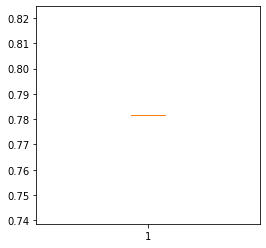

In [ ]:
model2_all_test_acc = pd.read_csv(output_dir_path+"model2_all_test_acc.csv")

import matplotlib.pyplot as plt

fig = plt.figure(figsize= (4, 4))
plt.boxplot(model2_all_test_acc.iloc[:,1])

fig.savefig(output_dir_path+"model2_test_acc_boxplot.png", dpi = 600)
plt.show()

**bold text**
### **Model 3:  32-16-8-filters three convolutional layers and   20-10 neurons two dense layers CNN Model**


For example, lets pretend we got the  best hyperpameters as follows.

- Best optimizer: "Adagrad" 
- Best learning rate: 0.001
- Best epochs = 30


Then  you need to train the Model 2 one more time. 





#### **Step 1: Train the model upto 10 independent replicates**

In [ ]:
model3_final_output = Multi_Run_CNN_Model(num_replicates = 1,
                                   conv_layers =  [32, 16, 8],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (28, 28, 1), 
                                    output_dim  = 10, 
                                    optimizer = 'Adagrad',  # best optimizer
                                    learning_rate = 0.001, # best learning rate
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test, 
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20, # best epochs
                                    verbose = 1
                                    )


===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 2.0117 - accuracy: 0.3328 - val_loss: 1.7460 - val_accuracy: 0.4158
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6556 - accuracy: 0.4508 - val_loss: 1.5906 - val_accuracy: 0.4769
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5345 - accuracy: 0.5033 - val_loss: 1.4943 - val_accuracy: 0.5163
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4487 - accuracy: 0.5385 - val_loss: 1.4217 - val_accuracy: 0.5399
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.3826 - accuracy: 0.5543 - val_loss: 1.3681 - val_accuracy: 0.5562
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3300 - accuracy: 0.5745 - val_loss: 1.3202 - val_accuracy: 0.5688
Epoch 7/20
1500/1

In [ ]:
model3_final_output



{'best_model': {'model': <keras.engine.sequential.Sequential at 0x7ff2e16893a0>,
  'model_history': <keras.callbacks.History at 0x7ff1f0608b20>,
  'test_loss': 1.0532478094100952,
  'test_acc': 0.6712999939918518,
  'test_predictions': array([[4.5443707e-05, 2.6460481e-07, 1.8952502e-04, ..., 7.6384924e-02,
          1.2337830e-01, 5.1198512e-01],
         [9.8568276e-03, 7.9109473e-03, 2.6197472e-01, ..., 1.4278629e-01,
          1.8826830e-01, 4.9369913e-02],
         [2.7672434e-04, 9.9954897e-01, 4.8940560e-11, ..., 1.2539728e-05,
          1.0556865e-10, 2.4229220e-08],
         ...,
         [1.3470554e-02, 4.2875152e-05, 1.0490188e-03, ..., 1.0412453e-05,
          2.2062327e-01, 6.2273104e-02],
         [5.4337562e-04, 9.8477244e-01, 8.6885299e-09, ..., 3.3479606e-04,
          4.7459277e-08, 5.4345592e-06],
         [3.1516264e-04, 1.2444976e-03, 4.0069010e-02, ..., 1.4437988e-01,
          8.1684291e-02, 6.5192305e-02]], dtype=float32)},
 'best_replicate': 0,
 'all_test_acc':

In [ ]:
#full results 
write_dic_to_file(model3_final_output, output_dir_path+ "model3_full_results" + ".txt")
# Test accuracies from all replicates
pd.DataFrame(model3_final_output['all_test_acc']).to_csv(output_dir_path+"model3_all_test_acc.csv")



#### **Step2: Boxplot of all the accuracies obtained from 10 replicates**

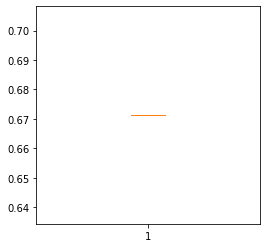

In [ ]:
model3_all_test_acc = pd.read_csv(output_dir_path+"model3_all_test_acc.csv")


import matplotlib.pyplot as plt
fig = plt.figure(figsize= (4, 4))
plt.boxplot(model3_all_test_acc.iloc[:,1])

fig.savefig(output_dir_path+"model3_test_acc_boxplot.png", dpi = 600)
plt.show()

## **Step 8: Model Evaluations and Results Visualization**


## **Looking  the distributions of the test accuracy scores**

#### **Collecting all test accuracy scores**

In [ ]:
model1_all_test_acc = pd.read_csv(output_dir_path+"model1_all_test_acc.csv")

model2_all_test_acc = pd.read_csv(output_dir_path+"model2_all_test_acc.csv")
model3_all_test_acc = pd.read_csv(output_dir_path+"model3_all_test_acc.csv")

test_acc_df = pd.DataFrame( { 
         'Model1': model1_all_test_acc.iloc[:,1],
         'Model2': model2_all_test_acc.iloc[:,1],
         'Model3': model3_all_test_acc.iloc[:,1]

    })

print(test_acc_df)

   Model1  Model2  Model3
0  0.8493  0.7816  0.6713


#### **Making Basic Comparative Boxplots**

**Try**: Make this better

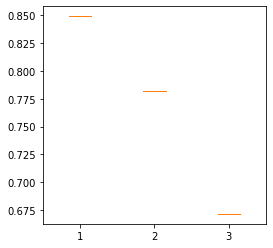

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (4, 4))
plt.boxplot(test_acc_df.T)
#fig.savefig(output_dir_path+"all_models_test_acc_boxplots.png", dpi = 600)
plt.show()

#### **More customized comparative boxplots**

In [ ]:
def comparative_test_acc_boxplots(model1_all_test_acc, model2_all_test_acc, model3_all_test_acc):
  data = pd.DataFrame()
  data['Model1'] = model1_all_test_acc
  data['Mode2'] =  model2_all_test_acc
  data['Mode3'] =  model3_all_test_acc
  fig = plt.figure(figsize = (8,5))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred', 'darkgreen']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2, 3], ['Model1','Model2', 'Model3'])
  plt.ylabel('Test Accuracy')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10) 
  
  fig.savefig(output_dir_path+"comparative_test_acc_boxplots.png",dpi=600)
  plt.show()

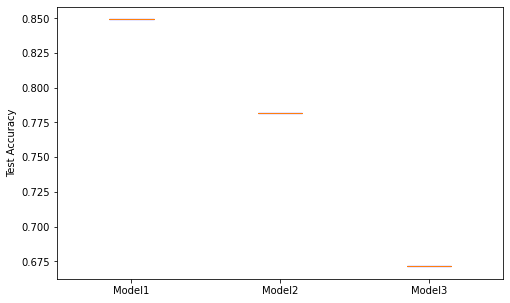

In [ ]:
comparative_test_acc_boxplots(model1_all_test_acc.iloc[:, 1], model2_all_test_acc.iloc[:, 1], model3_all_test_acc.iloc[:, 1])


## **Graph of average test accuracy**

- Look average test accuracy from files

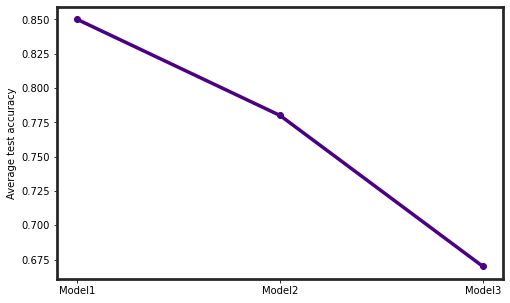

In [ ]:
ave_acc_df = pd.DataFrame(  {
           'Models': ["Model1", "Model2", "Model3"],
           'avg_acc': np.array([.85, 0.78, .67]) # you need to find out this
})

fig = plt.figure(figsize= (8, 5))
plt.plot(ave_acc_df['Models'], ave_acc_df['avg_acc'], '-o', linewidth = 3.5, color = 'indigo' )
plt.ylabel("Average test accuracy")
fig.savefig(output_dir_path+"avg_acc_plot.png", dpi = 600)
plt.show()

##**Task:**

Answer the following question with detail reasoning.

**Which model is performing the best in average?** MODEL 1

## **Step 9: Statistical Analysis(Optional For This Time)**

## **Step 10: Model Applications**

An application to use these models include the general concept of computer vision. With detection of clothing articles, we can use this to organize stores or warehouses. Programming these into machinery that can read what a tshirt is verus a shoe can help many companies manage inventory